In [2]:
import os 
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, log_loss,roc_curve

In [29]:
df_lgb_res = pd.read_csv('../03_result/trainA_pred_lgb7370.csv')[['id','0','isDefault']]

In [31]:
df_lgb_res.rename(
    columns={'0':'pred',
            'isDefault':'label'}
                    , inplace=True)

In [32]:
fpr,tpr,thresholds = roc_curve(df_lgb_res.label,df_lgb_res.pred)

In [33]:
df_pred_ordered = df_lgb_res.sort_values(by='pred',ascending=False).reset_index(drop=True)

In [34]:
# plot gains chart
def plot_gains(df_pred_ordered):
    df_pred_ordered['gains'] = df_pred_ordered.label.cumsum()
    df_pred_ordered['gains_perc'] = df_pred_ordered.gains / df_pred_ordered.gains.max()
    return df_pred_ordered    

In [70]:
# calculate lift table
def calculate_lift(df_pred_ordered):
    df_pred_ordered['lift'] =  df_pred_ordered.gains_perc / (df_pred_ordered.index/df_pred_ordered.shape[0])
    return df_pred_ordered


In [35]:
df_pred_ordered_with_gains = plot_gains(df_pred_ordered)

In [60]:
cut_off_indexes = np.linspace(1,10,10)*80000-1

In [61]:
df_gains_chart = df_pred_ordered_with_gains.iloc[cut_off_indexes,:]['gains_perc']

In [68]:
df_gains_chart = df_gains_chart.append(pd.Series(0,index=[0])).sort_index()

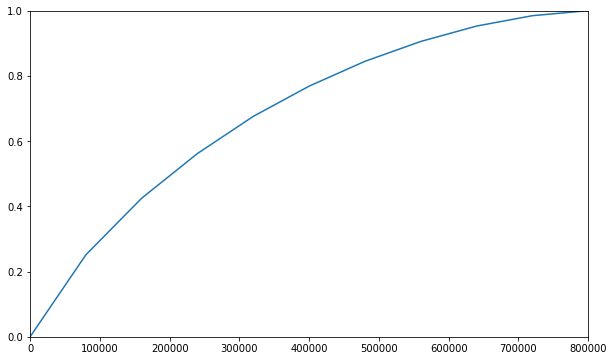

In [69]:
plt.figure(figsize=(10,6))
plt.axis([0,800000,0,1])
plt.plot(df_gains_chart)

In [72]:
df_lift_chart = calculate_lift(df_pred_ordered_with_gains)

In [74]:
df_lift_chart.iloc[cut_off_indexes,:]

,id,pred,label,gains,gains_perc,lift
79999,65406,0.721724,0,40126,0.251400,2.514034
159999,722971,0.633879,1,67823,0.424930,2.124661
239999,455665,0.562427,0,89695,0.561964,1.873220
319999,538463,0.498206,0,107864,0.675797,1.689498
399999,372612,0.436946,1,122656,0.768473,1.536950
479999,193048,0.376355,0,134793,0.844515,1.407528
559999,698269,0.314103,0,144519,0.905451,1.293503
639999,339490,0.247965,0,152048,0.952622,1.190779
719999,624411,0.169656,0,157128,0.984450,1.093834
799999,729794,0.006166,0,159610,1.000000,1.000001
